<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D0%BE%D0%B9_%D1%86%D0%B8%D1%84%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from tensorflow.keras.datasets import mnist     
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense       
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image           
import numpy as np                           
import matplotlib.pyplot as plt 

from google.colab import files
from io import BytesIO
from PIL import Image

%matplotlib inline              

In [ ]:
uploaded = files.upload()

Saving 1645263600297.jpg to 1645263600297 (1).jpg


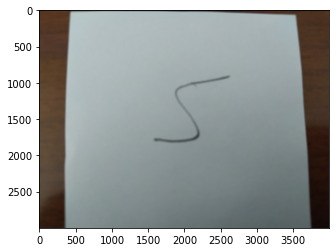

In [ ]:
im = Image.open(BytesIO(uploaded['1645263600297.jpg']))
plt.imshow(im)
plt.show()

In [ ]:
x_test = []
x_test.append(image.img_to_array(image.load_img('/content/1645263600297.jpg', target_size=(28, 28), color_mode='grayscale')))
x_test = np.array(x_test)
# инвертируем
x_test = 225. - x_test

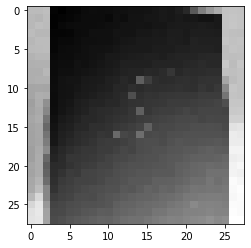

In [ ]:
plt.imshow(x_test.reshape(28,28), cmap='gray')

In [ ]:
X_test = x_test.reshape(x_test.shape[0], -1)
X_test = X_test.astype('float32') / 255.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# подготовка тренировочных данных
X_train = x_train.reshape(x_train.shape[0], -1) 
X_train = X_train.astype('float32') / 255. 
Y_train = utils.to_categorical(y_train, 10)

In [ ]:
# создание нейронной сети
model = Sequential()

In [ ]:
model.add(Dense(500, input_dim=784, activation='relu')) 
model.add(Dense(200, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 200)               100200    
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2256 - accuracy: 0.9343
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0867 - accuracy: 0.9729
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0388 - accuracy: 0.9879
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9918
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9945
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0152 - accuracy: 0.9951
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0155 - accuracy: 0.9950

In [ ]:
x = X_test[0]
x = np.expand_dims(x, axis=0)

In [ ]:
prediction = model.predict(x)
print(prediction)

[[1.4185672e-11 2.4530276e-08 8.4073916e-05 2.8482214e-07 2.6528924e-15
  9.9942005e-01 3.0753615e-11 4.9561553e-04 4.6852495e-09 4.6101550e-10]]


In [ ]:
pred = np.argmax(prediction)
print(pred)

5
